https://colab.research.google.com/drive/1opM3OZ9CCCBNh9PE_ZXAVm5JsCvJgEt6

In [0]:
import numpy as np
import scipy as sc
import sklearn as sk
import pandas  as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.python.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [0]:
from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential
from keras import optimizers
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [0]:
df = pd.read_csv('kickstarter_clean2.csv')
df.describe()

backers_count   usd_pledged      duration    staff_pick         state  \
count   22487.000000  2.248700e+04  2.248700e+04  22487.000000  22487.000000   
mean       95.868991  6.138689e+03  3.038951e+06      0.090185      0.622938   
std       295.772794  2.624028e+04  1.077435e+06      0.286454      0.484661   
min         0.000000  0.000000e+00  2.605770e+05      0.000000      0.000000   
25%         6.000000  1.976923e+02  2.592000e+06      0.000000      0.000000   
50%        30.000000  1.502898e+03  2.592000e+06      0.000000      1.000000   
75%        86.000000  5.581625e+03  3.456000e+06      0.000000      1.000000   
max     10061.000000  1.123232e+06  5.187600e+06      1.000000      1.000000   

       start_backers_count  category_pos      usd_goal  \
count         22487.000000  22487.000000  22487.000000   
mean             56.904256      5.981234   4480.108469   
std             174.089348      4.307605   4188.815944   
min               0.000000      1.000000      0.923175   
25%               3.000000      3.000000   1000.000000   
50%              16.000000      5.000000   3000.000000   
75%              49.000000      8.000000   6860.745606   
max            6304.000000     19.000000  16032.424000   

       start_usd_pledged_amount  completed_time       ...        film & video  \
count              22487.000000    22487.000000       ...        22487.000000   
mean                3583.276004        0.477902       ...            0.118068   
std                16520.805699        0.290850       ...            0.322696   
min                    0.000000       -0.105892       ...            0.000000   
25%                  101.000000        0.233750       ...            0.000000   
50%                  713.000000        0.477933       ...            0.000000   
75%                 2796.837132        0.727250       ...            0.000000   
max               796427.111859        2.009718       ...            1.000000   

               food         games    journalism         music   photography  \
count  22487.000000  22487.000000  22487.000000  22487.000000  22487.000000   
mean       0.062481      0.071686      0.018811      0.092854      0.033264   
std        0.242032      0.257973      0.135860      0.290234      0.179328   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         publishing    technology       theater  launched_month  
count  22487.000000  22487.000000  22487.000000    22487.000000  
mean       0.104282      0.064437      0.032908        5.455686  
std        0.305633      0.245536      0.178400        3.273636  
min        0.000000      0.000000      0.000000        1.000000  
25%        0.000000      0.000000      0.000000        2.000000  
50%        0.000000      0.000000      0.000000        5.000000  
75%        0.000000      0.000000      0.000000        8.000000  
max        1.000000      1.000000      1.000000       12.000000  

[8 rows x 48 columns]

In [0]:
df['completed_time'].describe()

count    22487.000000
mean         0.477902
std          0.290850
min         -0.105892
25%          0.233750
50%          0.477933
75%          0.727250
max          2.009718
Name: completed_time, dtype: float64

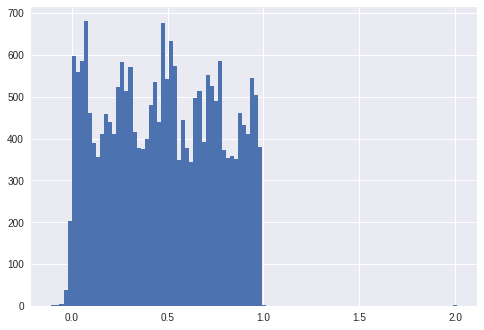

In [0]:
plt.hist(df['completed_time'], bins=100)
plt.show()


In [0]:
df['completed_time'] = np.clip(df['completed_time'], 0, 1)

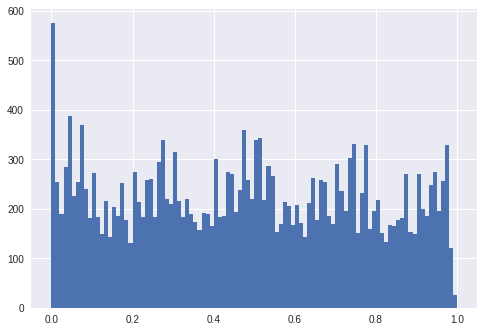

In [0]:
plt.hist(df['completed_time'], bins=100)
plt.show()

In [0]:
df.columns

Index(['backers_count', 'usd_pledged', 'duration', 'staff_pick', 'state',
       'start_backers_count', 'category_pos', 'usd_goal',
       'start_usd_pledged_amount', 'completed_time', 'AT', 'AU', 'BE', 'CA',
       'CH', 'DE', 'DK', 'ES', 'FR', 'GB', 'HK', 'IE', 'IT', 'JP', 'LU', 'MX',
       'NL', 'NO', 'NZ', 'SE', 'SG', 'US', 'art', 'comics', 'crafts', 'dance',
       'design', 'fashion', 'film & video', 'food', 'games', 'journalism',
       'music', 'photography', 'publishing', 'technology', 'theater',
       'launched_month'],
      dtype='object')

In [0]:
X = df.drop(['state', 'usd_pledged', 'backers_count'], axis=1)
Y_category = to_categorical(df['state'], 2)
Y_prediction = df[['usd_pledged', 'backers_count']].values

In [0]:
Y_category

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X.values)
X_scaled = scaler.transform(X.values)
x_train, x_test, y_cat_train, y_cat_test = train_test_split(X_scaled, Y_category, test_size=.3)


In [0]:
print(x_train, y_cat_train)

[[4.40515906e-01 0.00000000e+00 1.52284264e-02 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [3.85511292e-01 0.00000000e+00 2.07804569e-02 ... 1.00000000e+00
  0.00000000e+00 4.54545455e-01]
 [4.73191012e-01 0.00000000e+00 6.34517766e-04 ... 0.00000000e+00
  0.00000000e+00 9.09090909e-02]
 ...
 [4.73191012e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.87904095e-01 0.00000000e+00 6.83692893e-02 ... 0.00000000e+00
  0.00000000e+00 4.54545455e-01]
 [2.10151850e-01 0.00000000e+00 6.82106599e-03 ... 0.00000000e+00
  0.00000000e+00 6.36363636e-01]] [[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [0]:
model = Sequential()

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

sgd = optimizers.SGD(lr=0.005, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['mse', 'accuracy'])

mc = ModelCheckpoint(filepath='./weights_categories.h5', monitor='val_acc', save_best_only='True', save_weights_only='True', verbose=1)
metrics = model.fit(x_train, y_cat_train, epochs=100, batch_size=32, validation_data=(x_test, y_cat_test), callbacks=[mc])

Train on 15740 samples, validate on 6747 samples
Epoch 1/100
15740/15740 [==============================] - 3s 186us/step - loss: 0.6273 - mean_squared_error: 0.2192 - acc: 0.6449 - val_loss: 0.5817 - val_mean_squared_error: 0.1992 - val_acc: 0.6930

Epoch 00001: val_acc improved from -inf to 0.69305, saving model to ./weights_categories.h5
Epoch 2/100
15740/15740 [==============================] - 3s 177us/step - loss: 0.5937 - mean_squared_error: 0.2045 - acc: 0.6794 - val_loss: 0.5718 - val_mean_squared_error: 0.1949 - val_acc: 0.7031

Epoch 00002: val_acc improved from 0.69305 to 0.70313, saving model to ./weights_categories.h5
Epoch 3/100
15740/15740 [==============================] - 3s 175us/step - loss: 0.5842 - mean_squared_error: 0.2004 - acc: 0.6848 - val_loss: 0.5665 - val_mean_squared_error: 0.1926 - val_acc: 0.7012

Epoch 00003: val_acc did not improve from 0.70313
Epoch 4/100
15740/15740 [==============================] - 3s 175us/step - loss: 0.5779 - mean_squared_error

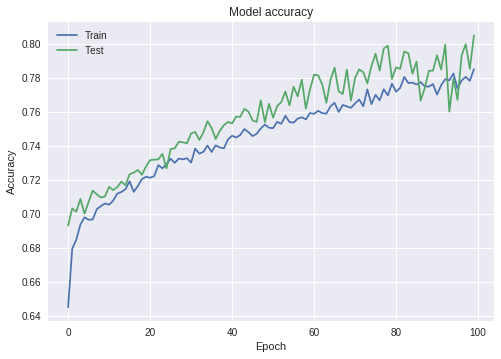

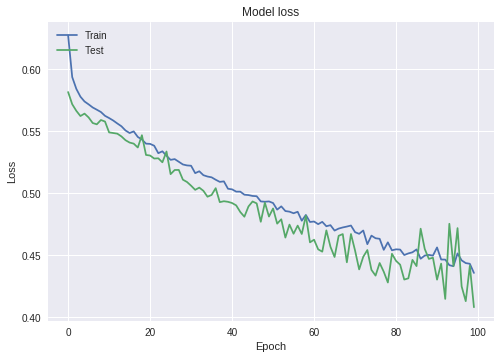

In [0]:
# Plot training & validation accuracy values
plt.plot(metrics.history['acc'])
plt.plot(metrics.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(metrics.history['loss'])
plt.plot(metrics.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
model.predict(x_train[0:10])

array([[0.23377842, 0.7662216 ],
       [0.04549048, 0.95450956],
       [0.59677356, 0.40322644],
       [0.1714108 , 0.8285892 ],
       [0.79358864, 0.20641135],
       [0.03250051, 0.96749955],
       [0.51607287, 0.48392707],
       [0.7217369 , 0.27826306],
       [0.05572492, 0.944275  ],
       [0.33472106, 0.6652789 ]], dtype=float32)

In [0]:
x_train2, x_test2, y_pred_train, y_pred_test = train_test_split(X_scaled, Y_prediction, test_size=.3)

In [0]:
model2 = Sequential()

model2.add(Dense(units=64, activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(units=32, activation='relu'))
model2.add(Dense(units=2, activation='linear'))

sgd2 = optimizers.SGD(lr=0.05, decay=1e-6, momentum=0.9, nesterov=True)

model2.compile(loss='mean_squared_error',
              optimizer='adadelta',
              metrics=['mse', 'accuracy'])

mc2 = ModelCheckpoint(filepath='./weights_predictions.h5', monitor='val_acc', save_best_only='True', save_weights_only='True', verbose=1)
metrics2 = model2.fit(x_train2, y_pred_train, epochs=200, batch_size=32, validation_data=(x_test2, y_pred_test), callbacks=[mc2])

Train on 15740 samples, validate on 6747 samples
Epoch 1/200
15740/15740 [==============================] - 3s 211us/step - loss: 334612494.4945 - mean_squared_error: 334612494.4945 - acc: 0.9837 - val_loss: 354133355.4457 - val_mean_squared_error: 354133355.4457 - val_acc: 0.9929

Epoch 00001: val_acc improved from -inf to 0.99289, saving model to ./weights_predictions.h5
Epoch 2/200
15740/15740 [==============================] - 3s 193us/step - loss: 325266126.0915 - mean_squared_error: 325266126.0915 - acc: 0.9925 - val_loss: 352385955.5311 - val_mean_squared_error: 352385955.5311 - val_acc: 0.9929

Epoch 00002: val_acc did not improve from 0.99289
Epoch 3/200
15740/15740 [==============================] - 3s 192us/step - loss: 324158350.0643 - mean_squared_error: 324158350.0643 - acc: 0.9924 - val_loss: 351003106.6649 - val_mean_squared_error: 351003106.6649 - val_acc: 0.9926

Epoch 00003: val_acc did not improve from 0.99289
Epoch 4/200
15740/15740 [==============================]

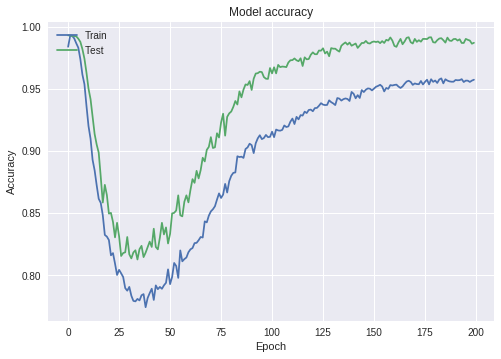

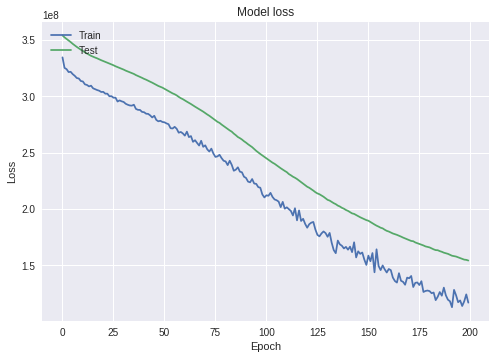

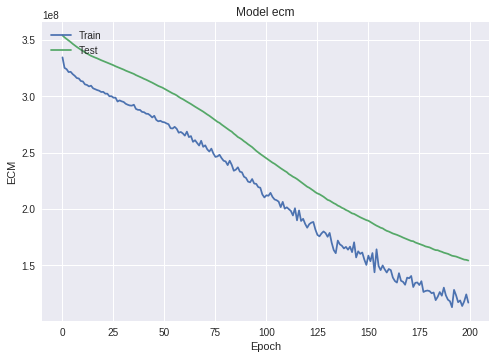

In [0]:
# Plot training & validation accuracy values
plt.plot(metrics2.history['acc'])
plt.plot(metrics2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(metrics2.history['loss'])
plt.plot(metrics2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation loss values
plt.plot(metrics2.history['mean_squared_error'])
plt.plot(metrics2.history['val_mean_squared_error'])
plt.title('Model ecm')
plt.ylabel('ECM')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
np.abs(model2.predict(x_test2) - y_pred_test).mean()

22471503591.28021

In [0]:
model2.predict(x_test2[0:2])

array([[3.7833449e+10, 5.0675546e+08],
       [3.7729751e+10, 5.0559414e+08]], dtype=float32)

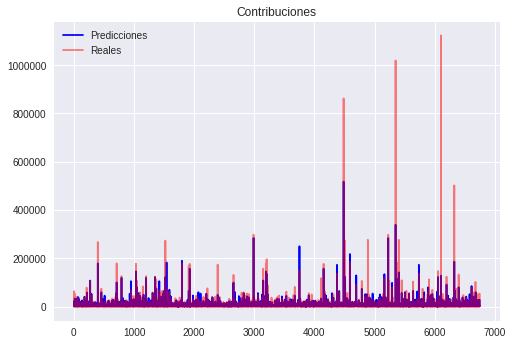

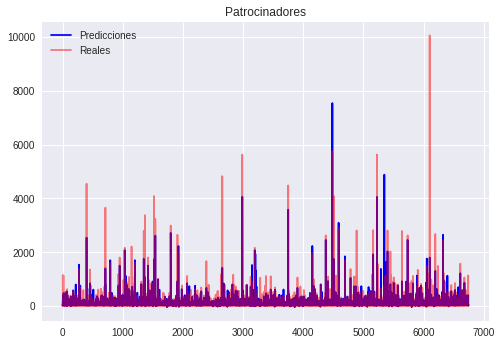

In [0]:
predictions = model2.predict(x_test2)

plt.title("Contribuciones")
plt.plot(predictions[:,0], c='blue', label='Predicciones')
plt.plot(y_pred_test[:,0], c='red', alpha=.5, label='Reales')
plt.legend()
plt.show()

plt.title("Patrocinadores")
plt.plot(predictions[:,1], c='blue', label='Predicciones')
plt.plot(y_pred_test[:,1], c='red', alpha=.5, label='Reales')
plt.legend()
plt.show()

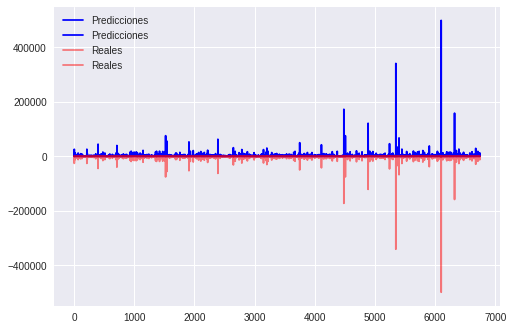

In [0]:
med = np.abs(y_pred_test - model2.predict(x_test2))
plt.plot(med / 2, c='blue', label='Predicciones')
plt.plot(-med / 2, c='red', alpha=.5, label='Reales')
plt.legend()
plt.show()

In [0]:
# https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176
# x_train, x_test, y_cat_train, y_cat_test 
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x_train, y_cat_train)

print('Dtree Score', dtree.score(x_test, y_cat_test))

Dtree Score 0.9623536386542166


In [0]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


In [0]:

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.657589 to fit



In [0]:
x_train2, x_test2, y_cat_train2, y_cat_test2 = train_test_split(X.values, Y_category, test_size=.3)

Dtree Score 0.874907366236846


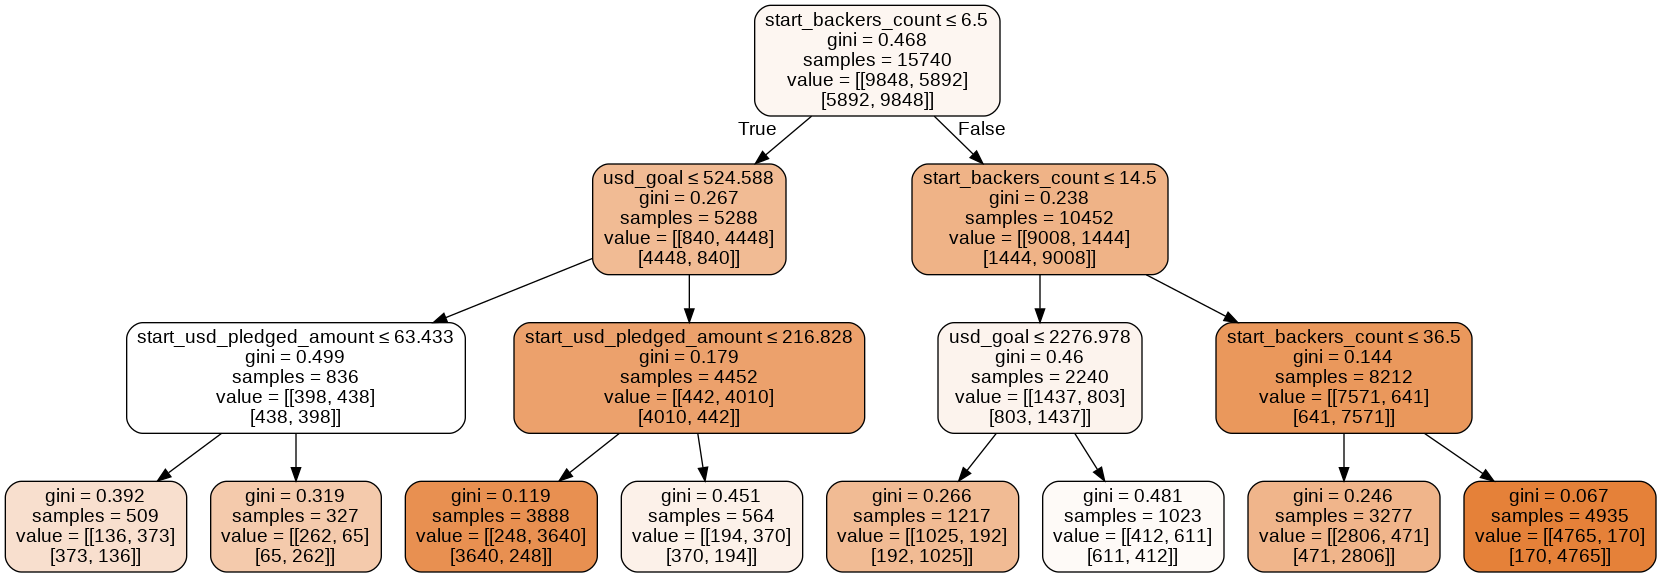

In [0]:
# https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176
# x_train, x_test, y_cat_train, y_cat_test 
from sklearn.tree import DecisionTreeClassifier
readable_dtree=DecisionTreeClassifier(max_depth=3)
readable_dtree.fit(x_train2, y_cat_train2)

print('Dtree Score', readable_dtree.score(x_test2, y_cat_test2))


dot_data = StringIO()
export_graphviz(readable_dtree, out_file=dot_data,  
                filled=True, rounded=True,
                feature_names=X.columns,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [0]:
X.columns

Index(['duration', 'staff_pick', 'start_backers_count', 'category_pos',
       'usd_goal', 'start_usd_pledged_amount', 'completed_time', 'AT', 'AU',
       'BE', 'CA', 'CH', 'DE', 'DK', 'ES', 'FR', 'GB', 'HK', 'IE', 'IT', 'JP',
       'LU', 'MX', 'NL', 'NO', 'NZ', 'SE', 'SG', 'US', 'art', 'comics',
       'crafts', 'dance', 'design', 'fashion', 'film & video', 'food', 'games',
       'journalism', 'music', 'photography', 'publishing', 'technology',
       'theater', 'launched_month'],
      dtype='object')